# Analysis of Varience

Import modules

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
np.random.seed(1)

Load data 

In [2]:
df = pd.read_excel('Aov.xlsx',sheet_name= 0)
df.head(3)

,Flavor,Eaten
0,Kidney,2.37
1,Kidney,2.62
2,Kidney,2.31


In [3]:
df.isna().sum()

Flavor    0
Eaten     0
dtype: int64

In [4]:
df.describe()

,Eaten
count,50.00000
mean,2.20300
std,0.33919
min,1.18000
25%,1.98250
50%,2.26000
75%,2.44000
max,2.69000


## Exploratory Data Analysis


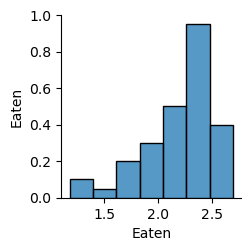

In [5]:
sns.pairplot(df)

## Encoding

In [6]:
df.head()

,Flavor,Eaten
0,Kidney,2.37
1,Kidney,2.62
2,Kidney,2.31
3,Kidney,2.47
4,Kidney,2.59


In [7]:
df = df.join(pd.get_dummies(df['Flavor'],prefix= 'Flavor'))

In [8]:
df.head()

,Flavor,Eaten,Flavor_Beef,Flavor_Chicken,Flavor_Kidney,Flavor_Salmon,Flavor_Shrimp
0,Kidney,2.37,0,0,1,0,0
1,Kidney,2.62,0,0,1,0,0
2,Kidney,2.31,0,0,1,0,0
3,Kidney,2.47,0,0,1,0,0
4,Kidney,2.59,0,0,1,0,0


### Variables X and Y


In [9]:
X = df.drop(['Eaten','Flavor'],axis=1)
Y = df['Eaten']

## levene test

To determine whether two or more features have equal variances

In [11]:
import scipy.stats as stats

levene_results = []
for i in X.columns:
    result = stats.levene(X[:][i], Y, center='median')
    print("X[{}]: {}".format(i, result))
    levene_results.append(result)

X[Flavor_Beef]: LeveneResult(statistic=0.5309773429164037, pvalue=0.4679340128539269)
X[Flavor_Chicken]: LeveneResult(statistic=0.5309773429164037, pvalue=0.4679340128539269)
X[Flavor_Kidney]: LeveneResult(statistic=0.5309773429164037, pvalue=0.4679340128539269)
X[Flavor_Salmon]: LeveneResult(statistic=0.5309773429164037, pvalue=0.4679340128539269)
X[Flavor_Shrimp]: LeveneResult(statistic=0.5309773429164037, pvalue=0.4679340128539269)


Since the p-value is relatively high (greater than the typical significance level of 0.05), we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that the variances of the groups (flavors) are significantly different.

In [12]:
FEG = df.groupby('Flavor')['Eaten'].var().reset_index()
FEG

,Flavor,Eaten
0,Beef,0.099027
1,Chicken,0.026284
2,Kidney,0.014760
3,Salmon,0.054418
4,Shrimp,0.025343


## Analysis Of varience test

A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): (It implies that the means of all the population are equal)


    H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
Aov1_results = []
for i in X.columns:
    result_i = sm.OLS(X[:][i],Y).fit()
    print("X[{}]: {}".format(i, result_i.f_pvalue))
    Aov1_results.append(result_i)
   

X[Flavor_Beef]: 0.011305566916851847
X[Flavor_Chicken]: 0.0004252348413111154
X[Flavor_Kidney]: 0.00023836524430303729
X[Flavor_Salmon]: 0.003037741984139059
X[Flavor_Shrimp]: 0.0003259828433272794


In conclusion, based on the provided p-values, all flavors (Beef, Chicken, Kidney, Salmon, Shrimp) have coefficients that are statistically significant in predicting the outcome variable.

## Tukey_HSD test

Using Tukey HSD to test for differences between groups

In [23]:
import statsmodels.stats.multicomp as mc
for i in X.columns:
    comp = mc.MultiComparison(X[:][i],Y)
    post_hoc_res = comp.tukeyhsd()
    print("X[{}]: {}".format(i, post_hoc_res.pvalues.mean()))


X[Flavor_Beef]: nan
X[Flavor_Chicken]: 0.9990121889407291
X[Flavor_Kidney]: 0.9968841081897675
X[Flavor_Salmon]: 0.8205149911719818
X[Flavor_Shrimp]: 0.9999491488444685
